In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append("/Users/derekdewald/Documents/Python/Github_Repo/d_py_functions")

In [2]:
from Validation import ColumnStatisticalReview,ColumnElementalChange,ColumnStatisticalCompare,DFStructureReview
from Visualization import Heatmap,plot_histograms,plot_scatter_matrix

In [3]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [4]:
df = pd.DataFrame()

for customer in [f"Customer {x}" for x in range(0,1000)]:
    DepositBalance = np.random.randint(0,1000000)
    LoanBalance = np.random.randint(0,1000000)
    TXN_VALUE = np.random.randint(0,10000)
    TXN_VOLUME = round(min(TXN_VALUE/ np.random.randint(1,100),np.random.randint(1,100)),0)
    
    temp_dict = {customer:{'DepositBalance':DepositBalance,
                           'LoanBalance': LoanBalance,
                           "TXN_VALUE": TXN_VALUE,
                           "TXN_VOLUME": TXN_VOLUME}}
    
    df = pd.concat([df,pd.DataFrame(temp_dict).T])
df1 = df*np.random.uniform(0.75, 1.25, size=(df.shape[0], 1))    
df1['TXN_VOLUME'] = df1['TXN_VOLUME'].apply(lambda x:round(x,0))
df = df.reset_index().rename(columns={'index':"CUSTOMERNBR"})
df1 = df1.reset_index().rename(columns={'index':"CUSTOMERNBR"})

In [5]:
df.head()

,CUSTOMERNBR,DepositBalance,LoanBalance,TXN_VALUE,TXN_VOLUME
0,Customer 0,231406.00,272405.00,7468.00,14.00
1,Customer 1,141366.00,459519.00,3618.00,37.00
2,Customer 2,865933.00,696214.00,8283.00,52.00
3,Customer 3,600126.00,429124.00,2335.00,30.00
4,Customer 4,855586.00,711560.00,3978.00,53.00


In [6]:
df1.head()

,CUSTOMERNBR,DepositBalance,LoanBalance,TXN_VALUE,TXN_VOLUME
0,Customer 0,213776.49,251652.01,6899.06,13.00
1,Customer 1,159493.50,518443.57,4081.94,42.00
2,Customer 2,971901.54,781413.18,9296.63,58.00
3,Customer 3,544776.62,389546.07,2119.64,27.00
4,Customer 4,991924.49,824947.80,4611.90,61.00


In [11]:
DFStructureReview(df)

{'TotalRecords_DF': 1000, 'TotalColumns_DF': 5}

In [12]:
DFStructureReview(df,'DepositBalance',df1)

{'TotalRecords_DF': 1000,
 'TotalColumns_DF': 5,
 'UniqueRecords_DF': 1000,
 'cols_missing_df': [],
 'cols_missing_df1': [],
 'TotalRecords_DF_1': 1000,
 'TotalColumns_DF1': 5}

In [7]:
ColumnElementalChange(df,df1,'DepositBalance',['CUSTOMERNBR'])

,count,VALUE
Records Increasing,512.00,NaN
Records Decreasing,488.00,NaN
Variance Partition 1,NaN,-242964.81
Variance Partition 2,NaN,-113078.84
Variance Partition 3,NaN,-60643.78
Variance Partition 4,NaN,-25876.22
Variance Partition 5,NaN,-10475.69
Variance Partition 6,NaN,1030.39
Variance Partition 7,NaN,12599.18
Variance Partition 8,NaN,40032.73


In [8]:
ColumnStatisticalCompare(df,df1,'DepositBalance')

,DepositBalance_DF,DepositBalance_DF1,DepositBalance_VAR_AMT,DepositBalance_VAR_PERC
SUM,505930346.00,502081179.68,3849166.32,0.01
MEAN,505930.35,502081.18,3849.17,0.01
STD_DEV,287503.41,298491.86,-10988.44,-0.04
MEDIAN,503377.50,484869.13,18508.37,0.04
MAX,997446.00,1235602.81,-238156.81,-0.19
MIN,135.00,134.44,0.56,0.00
TOTAL_RECORDS,1000.00,1000.00,0.00,0.00
UNIQUE_RECORDS,1000.00,1000.00,0.00,0.00
ZERO_RECORDS,0.00,0.00,0.00,0.00
NON_ZERO_RECORDS,1000.00,1000.00,0.00,0.00


In [9]:
ColumnStatisticalReview(df,'DepositBalance')

,DepositBalance
SUM,505930346.00
MEAN,505930.35
STD_DEV,287503.41
MEDIAN,503377.50
MAX,997446.00
MIN,135.00
TOTAL_RECORDS,1000.00
UNIQUE_RECORDS,1000.00
ZERO_RECORDS,0.00
NON_ZERO_RECORDS,1000.00


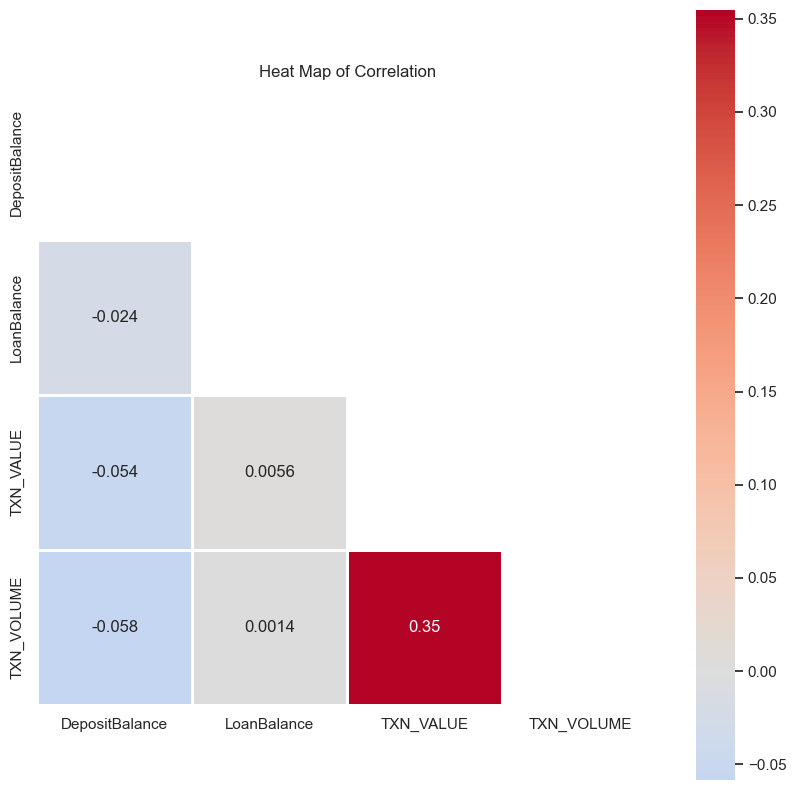

In [17]:
Heatmap(df.set_index('CUSTOMERNBR'))

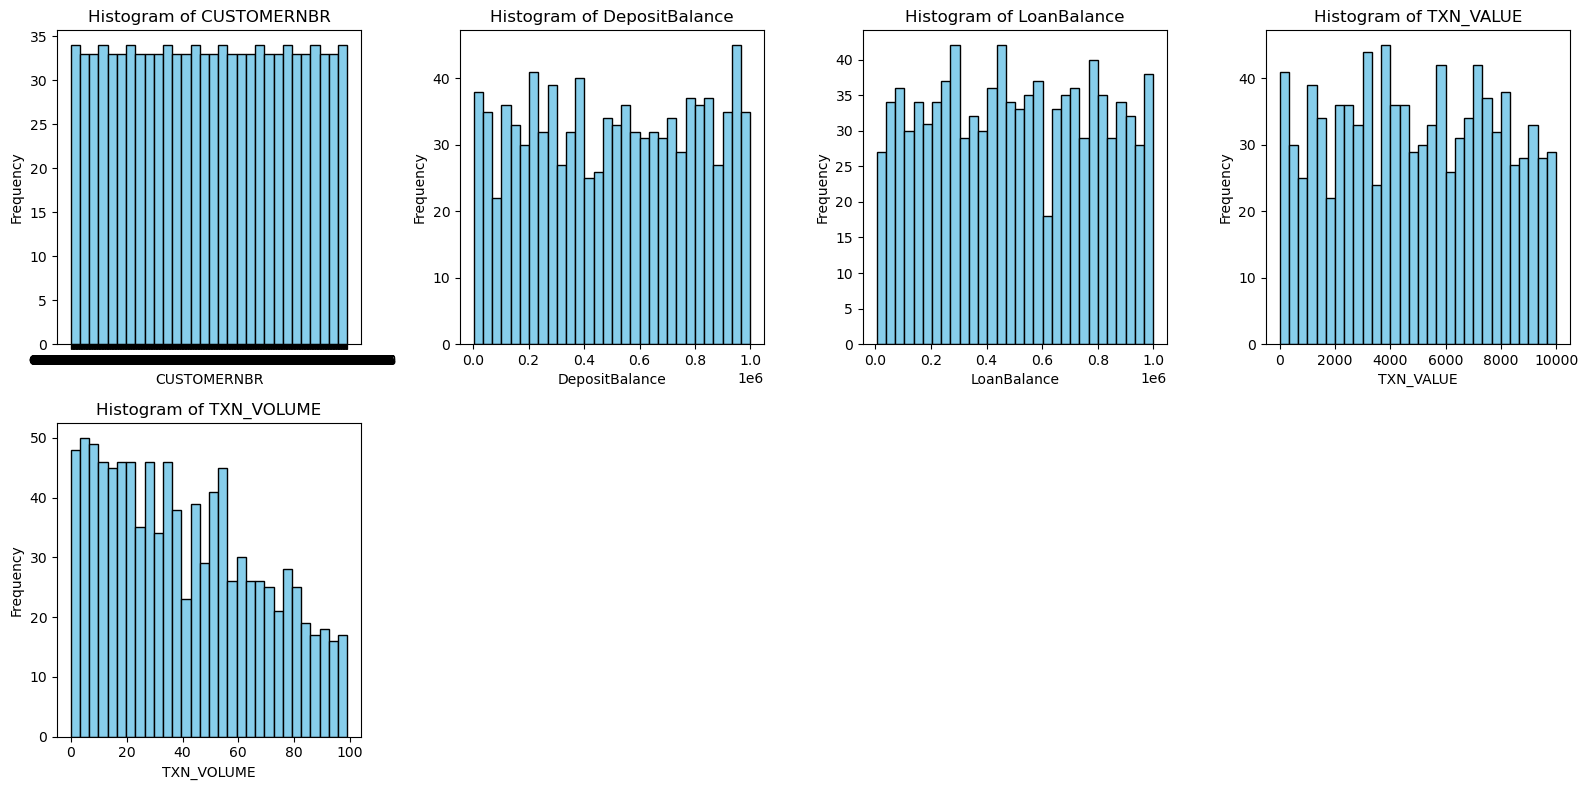

In [9]:
plot_histograms(df)

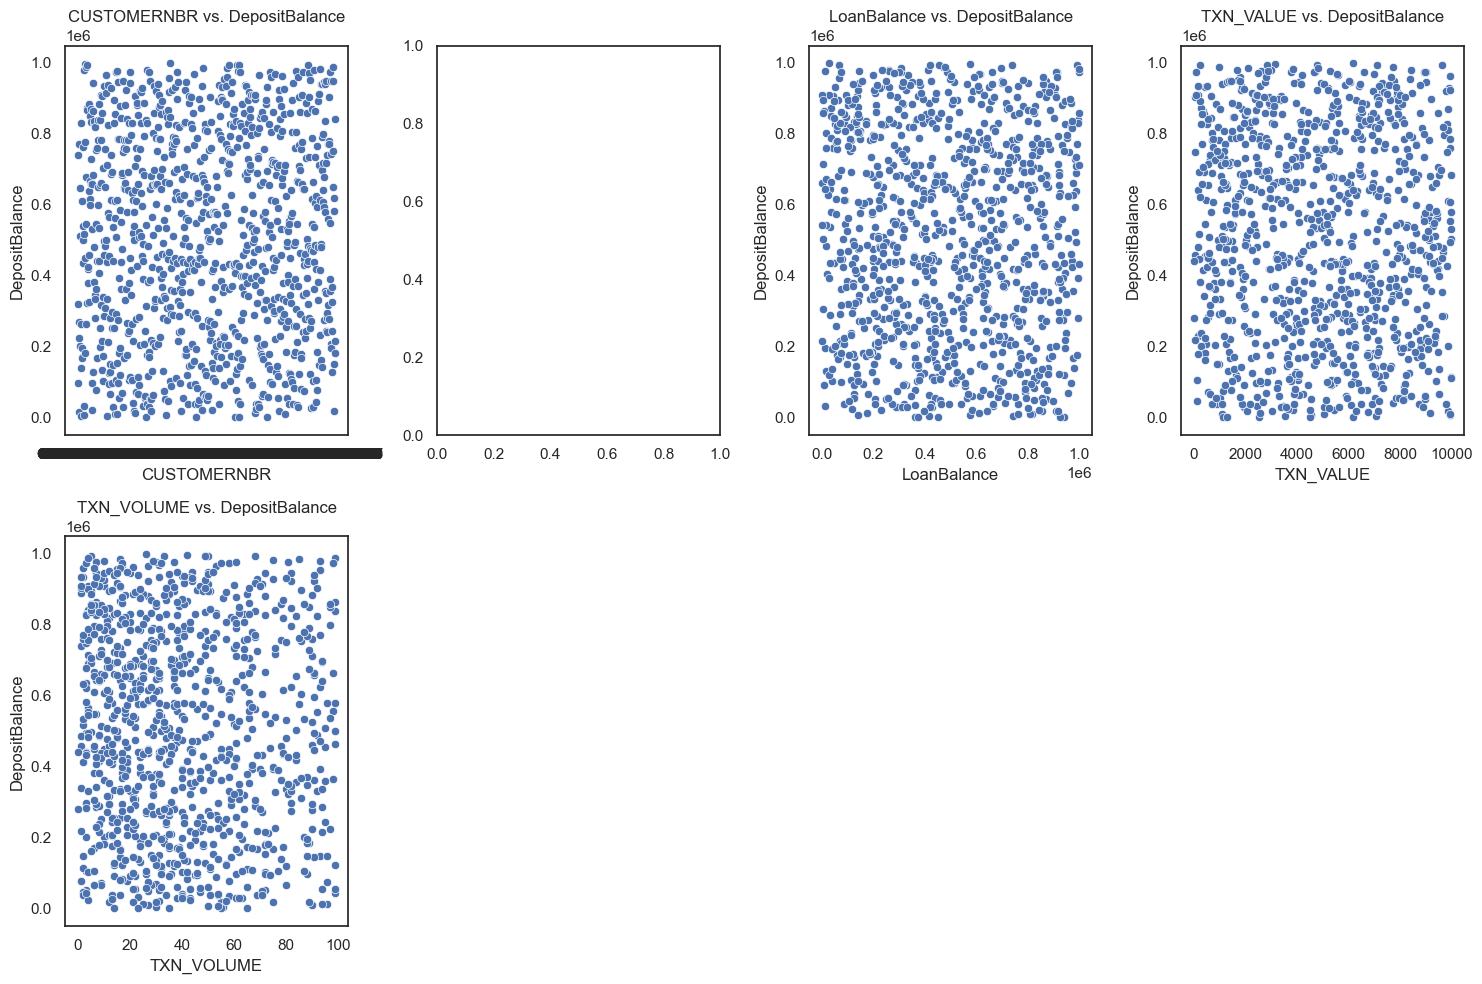

In [21]:
plot_scatter_matrix(df,'DepositBalance')

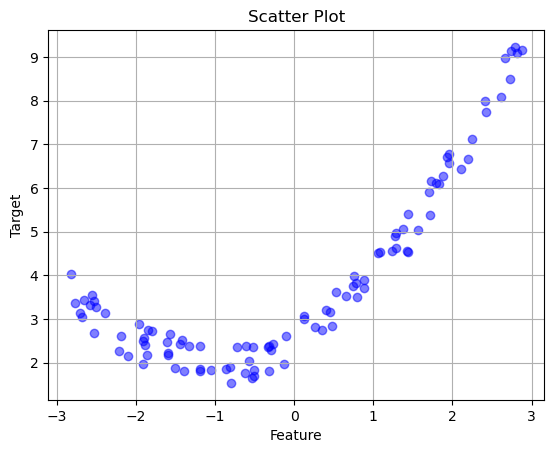

In [30]:
n = 100
X = 6 * np.random.rand(n,1)-3
y = .5*X**2 + X+2 + np.random.rand(n,1)
df = pd.DataFrame({'X':X.flatten(),"y":y.flatten()})


def Scatter(df,
            X,
            y,
            title='Scatter Plot',
            x_axis='Feature',
            y_axis='Target'):
    
    plt.scatter(df[X], df[y], color="blue", alpha=0.5)
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)
    plt.show()

Scatter(df,'X','y')


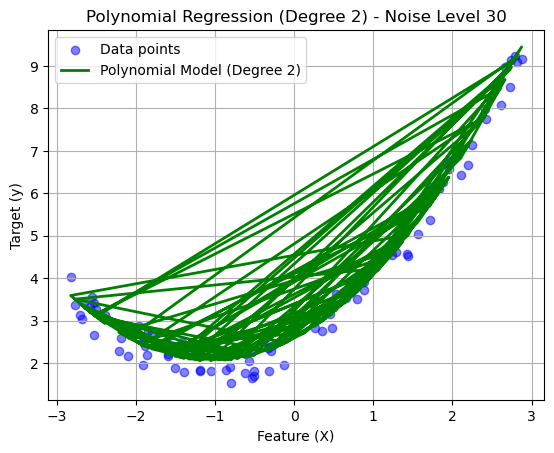

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


# Use Polynomial Regression of degree 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

# Plot Polynomial Regression
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X, y_poly_pred, color="green", linewidth=2, label="Polynomial Model (Degree 2)")
plt.title("Polynomial Regression (Degree 2) - Noise Level 30")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()


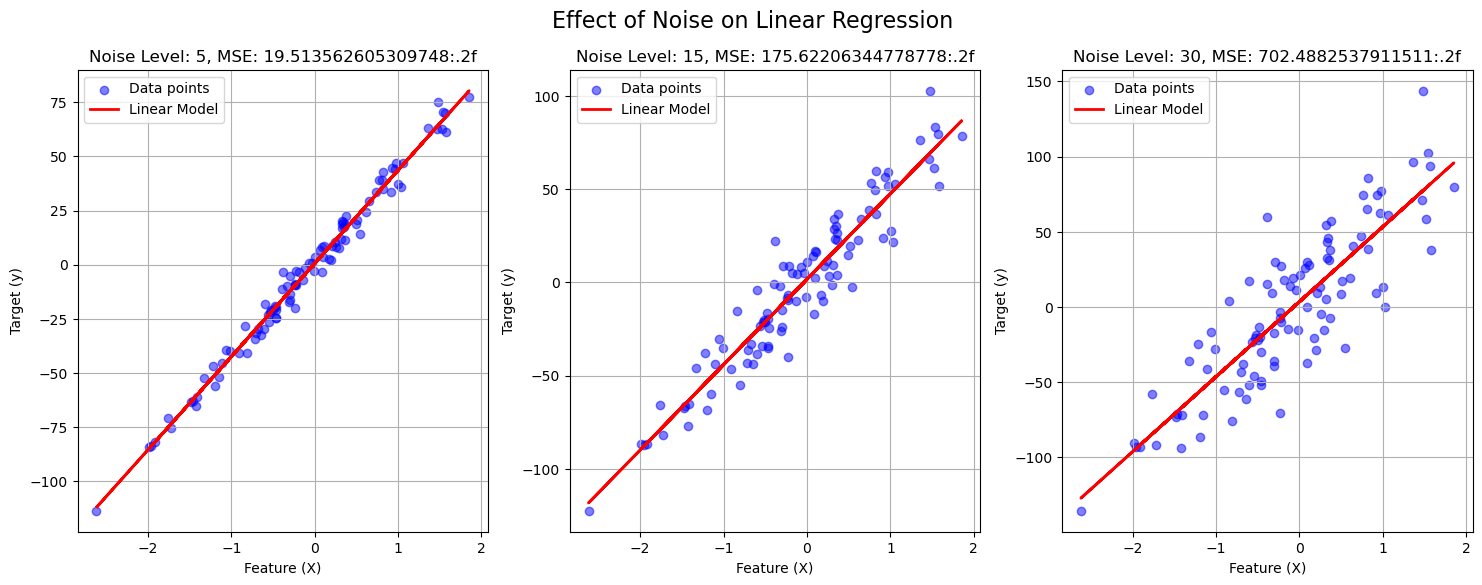

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define noise levels
noise_levels = [5, 15, 30]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, noise in enumerate(noise_levels):
    # Generate synthetic regression data with different noise levels
    X, y = make_regression(n_samples=100, n_features=1, noise=noise, random_state=42)

    # Train a simple linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)

    # Plot the data and regression line
    axes[i].scatter(X, y, color="blue", alpha=0.5, label="Data points")
    axes[i].plot(X, y_pred, color="red", linewidth=2, label="Linear Model")
    axes[i].set_title(f"Noise Level: {noise}, MSE: {mse}:.2f")
    axes[i].set_xlabel("Feature (X)")
    axes[i].set_ylabel("Target (y)")
    axes[i].legend()
    axes[i].grid(True)

# Show the plots
plt.suptitle("Effect of Noise on Linear Regression", fontsize=16)
plt.show()


In [57]:
from sklearn.model_selection import train_test_split


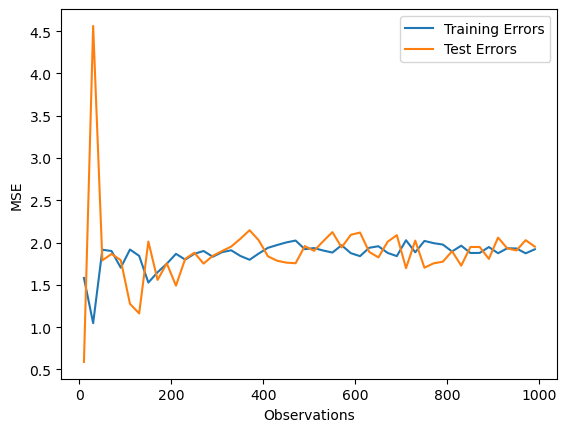

In [76]:
def TrainingLoss(model,X,y,loss,gap=50):
    
    train_errors = []
    test_errors = []
    
    records = range(10,len(X),gap)
    
    for obs in records:

        X_ = X[:obs]
        y_ = y[:obs]

        X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=.3)

        model.fit(X_train,y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        train_errors.append(mean_squared_error(y_train,y_pred_train))
        test_errors.append(mean_squared_error(y_test,y_pred_test)) 
        
    plt.plot(records,train_errors,label='Training Errors')
    plt.plot(records,test_errors,label='Test Errors')
    plt.xlabel('Observations')
    plt.ylabel('MSE')
    plt.legend()
    
TrainingLoss(LinearRegression(),X,y,"",20) 

In [18]:
import pandas as pd



,X,Y
0,2.908934,9.424140
1,-2.237222,2.896142
2,0.605462,3.534495
3,0.111237,2.682734
4,1.000732,3.815397
...,...,...
95,-0.653674,2.495814
96,-2.444640,3.044521
97,-0.313634,2.609418
98,0.970896,4.334366


In [45]:


from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,y)

X_smooth = np.linspace(-3, 3, 100).reshape(-1, 1)  # Smooth X values
X_smooth_poly = poly.transform(X_smooth)  # Transform smooth X

# Predict y values for smooth X range
y_pred_smooth = model.predict(X_smooth_poly)

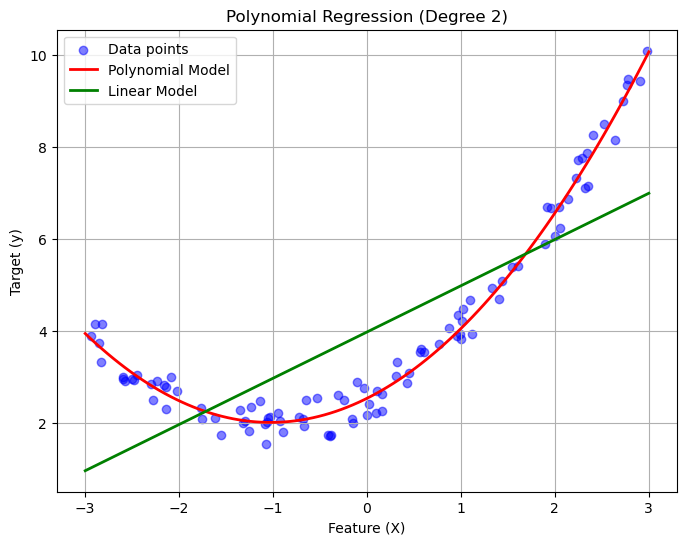

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate data
n = 100
X = 6 * np.random.rand(n, 1) - 3  # Features
y = 0.5 * X**2 + X + 2 + np.random.rand(n, 1)  # Quadratic function with noise
X_smooth = np.linspace(-3, 3, 100).reshape(-1, 1)  # Smooth X values

# Do Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred_linear = model.predict(X_smooth)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)

# Generate a smooth curve for prediction
X_smooth_poly = poly.transform(X_smooth)  # Transform smooth X

# Predict y values for smooth X range
y_pred_smooth = model.predict(X_smooth_poly)

# Plot data points and the model prediction curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X_smooth, y_pred_smooth, color="red", linewidth=2, label="Polynomial Model")
plt.plot(X_smooth, y_pred_linear, color="green", linewidth=2, label="Linear Model")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.grid(True)
plt.show()


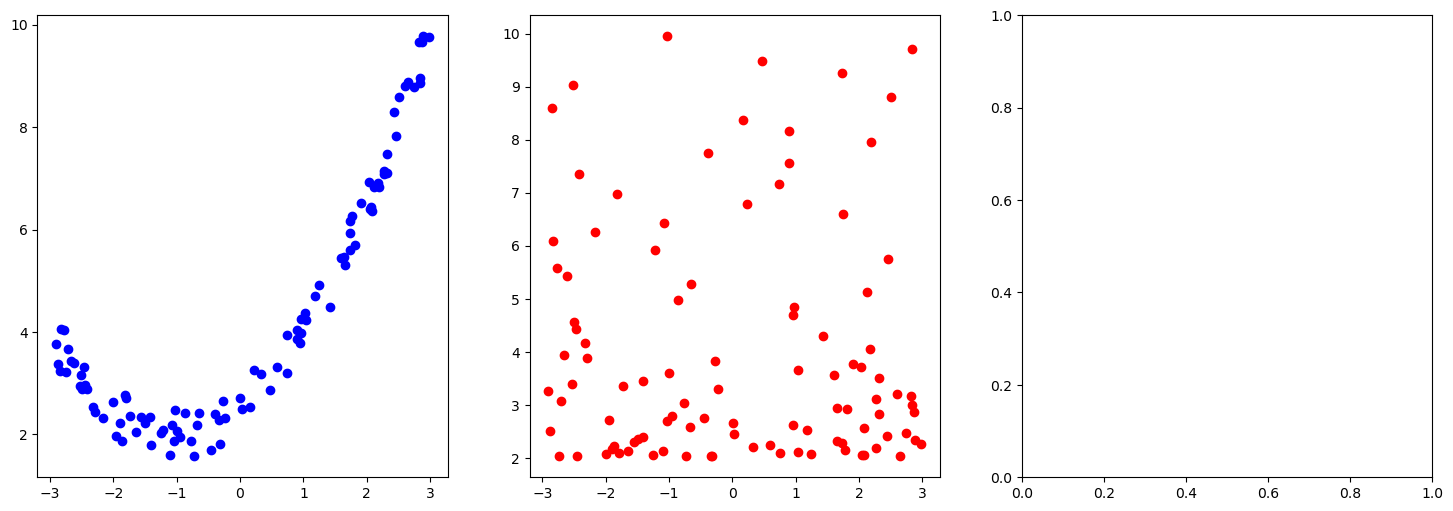

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X, y, color="blue", label="Data points")
axes[1].scatter(X, y_pred_smooth, color="red", label="Data points")


plt.show()

In [78]:


import pandas as pd
import numpy as np

from Connections import ParamterMapping,BackUpGoogleSheets


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

imputer = SimpleImputer()
# Cross Validation
# Embedding - Representational Learning


In [117]:
from sklearn.datasets import fetch_covtype

# Load dataset
covtype = fetch_covtype()
covtype

{'data': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]], shape=(581012, 54)),
 'target': array([5, 5, 2, ..., 3, 3, 3], shape=(581012,), dtype=int32),
 'frame': None,
 'target_names': ['Cover_Type'],
 'feature_names': ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_0',
  'Wilde

In [118]:
import time
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
from sklearn.utils import all_estimators
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_iris,load_wine
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Define default hyperparameters
default_parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'max_features': ['sqrt', 'log2', None],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'lambda': [0, 0.01, 0.1, 1, 10],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Function to filter valid hyperparameters
def filter_valid_hyperparams(model, param_grid):
    """Filter hyperparameters to only include those valid for the model."""
    valid_params = model.get_params().keys()
    return {k: v for k, v in param_grid.items() if k in valid_params}

# Get all available models
model_list = all_estimators(type_filter="classifier")  # Using only classifiers for Iris dataset

# Placeholder for results
results = []

# Start MLflow experiment
mlflow.set_experiment("Auto-Model Selection & Tuning")

# Loop through each model and apply either direct training or hyperparameter tuning
for name, model_class in model_list:
    try:
        model = model_class()  # Initialize the model instance
        start_time = time.time()

        # Get valid hyperparameters
        valid_params = filter_valid_hyperparams(model, default_parameters)
        print(model,valid_params)

        with mlflow.start_run(run_name=name):  # Start MLflow run

            # If valid hyperparameters exist, perform hyperparameter tuning
            if valid_params:
                search = RandomizedSearchCV(model, valid_params, n_iter=5, cv=3, scoring="accuracy", n_jobs=-1)
                search.fit(X_train, y_train)  # Perform hyperparameter search
                model = search.best_estimator_  # Use the best model
                mlflow.log_params(search.best_params_)  # Log best hyperparameters
                
                for i in range(len(search.cv_results_["params"])):
                    params = search.cv_results_["params"][i]
                    mean_test_score = search.cv_results_["mean_test_score"][i]
                    
                    param_str = "_".join(f"{k}-{v}" for k, v in params.items())
                    mlflow.log_metric(f"Test_Accuracy_{param_str}", mean_test_score)
                    
            else:
                model.fit(X_train, y_train)  # Train model without hyperparameter tuning

            # Predict and evaluate performance
            
            x_train_pred = model.predict(X_train)
            metric_train = accuracy_score(y_train, x_train_pred)
            mlflow.log_metric("Accuracy Train", metric_train)
            
            y_pred = model.predict(X_test)
            metric_test = accuracy_score(y_test, y_pred)  # Classification Accuracy
            mlflow.log_metric("Accuracy Test", metric_test)

            # Log model in MLflow
            mlflow.sklearn.log_model(model, name)

            # Log metadata
            mlflow.log_param("Model", name)
            mlflow.log_param("Training Time", round(time.time() - start_time, 2))

            # Append results
            results.append({
                "Model": name,
                "Train Accuracy": metric_train,
                "Test Accuracy":metric_test,
                "Time (s)": round(time.time() - start_time, 2),
                "Hyperparameters Used": bool(valid_params)  # Flag if hyperparameters were tuned
            })

    except Exception as e:
        print(f"{name} failed: {str(e)}")  # Handle errors but continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

AdaBoostClassifier() {'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [50, 100, 150, 200]}


2025/03/03 22:24:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


BaggingClassifier() {'n_estimators': [50, 100, 150, 200], 'max_features': ['sqrt', 'log2', None]}
BaggingClassifier failed: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
   

2025/03/03 22:24:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CalibratedClassifierCV() {}


2025/03/03 22:24:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^

CategoricalNB() {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
CategoricalNB failed: index 1680 is out of bounds for axis 1 with size 1548
ClassifierChain failed: ClassifierChain.__init__() missing 1 required positional argument: 'base_estimator'
ComplementNB() {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}


2025/03/03 22:24:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTreeClassifier() {'max_depth': [3, 5, 10, 20], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 5, 10, 20], 'max_features': ['sqrt', 'log2', None]}


2025/03/03 22:24:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DummyClassifier() {}


2025/03/03 22:24:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


ExtraTreeClassifier() {'max_depth': [3, 5, 10, 20], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 5, 10, 20], 'max_features': ['sqrt', 'log2', None]}


2025/03/03 22:24:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


ExtraTreesClassifier() {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 10, 20], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 5, 10, 20], 'max_features': ['sqrt', 'log2', None]}


2025/03/03 22:24:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


FixedThresholdClassifier failed: FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'
GaussianNB() {}


2025/03/03 22:24:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GaussianProcessClassifier() {}


2025/03/03 22:24:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoostingClassifier() {'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 10, 20], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 5, 10, 20], 'subsample': [0.5, 0.7, 0.9, 1.0], 'max_features': ['sqrt', 'log2', None]}


2025/03/03 22:24:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


HistGradientBoostingClassifier() {'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 5, 10, 20], 'max_features': ['sqrt', 'log2', None]}
HistGradientBoostingClassifier failed: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12

2025/03/03 22:24:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


LabelPropagation() {}


2025/03/03 22:24:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value enco

LabelSpreading() {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}


2025/03/03 22:24:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LinearDiscriminantAnalysis() {}


2025/03/03 22:24:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LinearSVC() {'C': [0.001, 0.01, 0.1, 1, 10]}


2025/03/03 22:24:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iteratio

LogisticRegression() {'C': [0.001, 0.01, 0.1, 1, 10]}


2025/03/03 22:24:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iteratio

LogisticRegressionCV() {}


/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

MLPClassifier() {'learning_rate': [0.01, 0.05, 0.1, 0.2], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
MLPClassifier failed: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints

2025/03/03 22:24:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


NearestCentroid() {}


2025/03/03 22:24:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


NuSVC() {}


2025/03/03 22:24:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


OneVsOneClassifier failed: OneVsOneClassifier.__init__() missing 1 required positional argument: 'estimator'
OneVsRestClassifier failed: OneVsRestClassifier.__init__() missing 1 required positional argument: 'estimator'
OutputCodeClassifier failed: OutputCodeClassifier.__init__() missing 1 required positional argument: 'estimator'
PassiveAggressiveClassifier() {'C': [0.001, 0.01, 0.1, 1, 10]}


2025/03/03 22:25:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Perceptron() {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}


2025/03/03 22:25:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


QuadraticDiscriminantAnalysis() {}


2025/03/03 22:25:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RadiusNeighborsClassifier() {}
RadiusNeighborsClassifier failed: No neighbors found for test samples array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.
RandomForestClassifier() {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 10, 20], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 5, 10, 20], 'max_features': ['sqrt', 'log2', None]}


2025/03/03 22:25:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RidgeClassifier() {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}


2025/03/03 22:25:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RidgeClassifierCV() {}


2025/03/03 22:25:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SGDClassifier() {'learning_rate': [0.01, 0.05, 0.1, 0.2], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
SGDClassifier failed: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/derekdewald/anaconda3/envs/BaseRequirements/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints

2025/03/03 22:25:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SelfTrainingClassifier() {}
SelfTrainingClassifier failed: You must pass an estimator to SelfTrainingClassifier. Use `estimator`.
StackingClassifier failed: StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV failed: TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'
VotingClassifier failed: VotingClassifier.__init__() missing 1 required positional argument: 'estimators'


,Model,Train Accuracy,Test Accuracy,Time (s),Hyperparameters Used
0,AdaBoostClassifier,0.992958,0.916667,2.70,True
1,BernoulliNB,0.401408,0.388889,0.95,True
2,CalibratedClassifierCV,0.985915,0.972222,0.98,False
3,ComplementNB,0.669014,0.694444,0.93,True
4,DecisionTreeClassifier,0.992958,0.944444,0.97,True
5,DummyClassifier,0.401408,0.388889,0.84,False
6,ExtraTreeClassifier,0.943662,0.944444,0.93,True
7,ExtraTreesClassifier,0.992958,1.000000,1.20,True
8,GaussianNB,0.971831,1.000000,0.94,False
9,GaussianProcessClassifier,1.000000,0.361111,1.04,False


In [120]:

experiment = mlflow.get_experiment_by_name("Auto-Model Selection & Tuning")
print(f"Experiment ID: {experiment.experiment_id}")

# Get All Runs in the Experiment
df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
print(df.head())  

Experiment ID: 728819180688287058
                             run_id       experiment_id    status  \
0  30650a21392741acbed4ca6d02351504  728819180688287058    FAILED   
1  dacdc50902f54eaab4dd3270cc3e31c1  728819180688287058  FINISHED   
2  f027c35a78114d399edc2092bf216ec9  728819180688287058    FAILED   
3  12876d623a334f01af5230a66af6028d  728819180688287058  FINISHED   
4  8497c36b47f84ff5afb8df9c3589af49  728819180688287058  FINISHED   

                                        artifact_uri  \
0  file:///Users/derekdewald/Documents/Python/Git...   
1  file:///Users/derekdewald/Documents/Python/Git...   
2  file:///Users/derekdewald/Documents/Python/Git...   
3  file:///Users/derekdewald/Documents/Python/Git...   
4  file:///Users/derekdewald/Documents/Python/Git...   

                        start_time                         end_time  \
0 2025-03-04 06:25:05.713000+00:00 2025-03-04 06:25:05.717000+00:00   
1 2025-03-04 06:25:04.801000+00:00 2025-03-04 06:25:05.711000+00:00   
2

In [122]:
df.to_csv('test.csv')

In [8]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target  # Continuous target variable

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Check data dimensions

X

(353, 10) (89, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', RandomForestRegressor(random_state=42))  # Model
])


In [3]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform randomized search
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid,
    n_iter=10, cv=5, scoring='neg_mean_squared_error',
    n_jobs=-1, random_state=42
)

# Train with hyperparameter tuning
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': 20}


In [6]:
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select relevant columns
results_df = results_df[
    [
        "mean_test_score",  # Mean score across all CV folds
        "std_test_score",   # Standard deviation across CV folds
        "rank_test_score",  # Rank of the model (lower is better)
        "param_regressor__n_estimators",
        "param_regressor__max_depth",
        "param_regressor__min_samples_split",
        "param_regressor__min_samples_leaf",
    ]
]

# Sort by best score
results_df = results_df.sort_values(by="rank_test_score")

results_df

,mean_test_score,std_test_score,rank_test_score,param_regressor__n_estimators,param_regressor__max_depth,param_regressor__min_samples_split,param_regressor__min_samples_leaf
2,-3442.054416,554.180927,1,200,20,10,1
8,-3442.444416,488.726955,2,200,10,5,4
9,-3450.795214,513.899658,3,200,None,5,2
1,-3455.079553,529.524395,4,300,None,5,2
4,-3457.960522,555.372948,5,50,10,10,2
0,-3468.072463,594.899054,6,100,30,10,1
7,-3496.908525,535.261586,7,100,10,5,4
3,-3499.838524,534.563284,8,100,20,2,4
6,-3525.111953,520.976994,9,50,30,2,4
5,-3540.719497,594.943848,10,50,None,2,2
